In [2]:
import pandas as pd
import numpy as np

In [3]:
visited = pd.read_csv('C:/Users/USER/Desktop/dataset/deepL/data_merge_exdata/survey_visited.csv') 
survey = pd.read_csv('C:/Users/USER/Desktop/dataset/deepL/data_merge_exdata/survey_survey.csv')

In [4]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [5]:
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [7]:
# Visited와 Survey Merge
vs = visited.merge(survey, left_on='ident',right_on='taken')
vs

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


In [8]:
num = pd.Series({'dog':4, 'amoeba':np.nan})
print(num)
# dog / amoeba는 index / 4.0, nan이 data
# series는 열 이름이 없다

dog       4.0
amoeba    NaN
dtype: float64


In [9]:
gapminder = pd.read_csv('C:/Users/USER/Desktop/dataset/deepL/pandas_data/gapminder.tsv',sep='\t')
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [10]:
# Country로 groupby, pop에대한 평균

print(gapminder.groupby(['country'])['pop'].mean())
print('='*50)
print(gapminder.groupby(['country'])['pop'].max())
print('='*50)
print(gapminder.groupby(['continent'])['gdpPercap'].mean())

country
Afghanistan           1.582372e+07
Albania               2.580249e+06
Algeria               1.987541e+07
Angola                7.309390e+06
Argentina             2.860224e+07
                          ...     
Vietnam               5.456857e+07
West Bank and Gaza    1.848606e+06
Yemen, Rep.           1.084319e+07
Zambia                6.353805e+06
Zimbabwe              7.641966e+06
Name: pop, Length: 142, dtype: float64
country
Afghanistan           31889923
Albania                3600523
Algeria               33333216
Angola                12420476
Argentina             40301927
                        ...   
Vietnam               85262356
West Bank and Gaza     4018332
Yemen, Rep.           22211743
Zambia                11746035
Zimbabwe              12311143
Name: pop, Length: 142, dtype: int64
continent
Africa       2193.754578
Americas     7136.110356
Asia         7902.150428
Europe      14469.475533
Oceania     18621.609223
Name: gdpPercap, dtype: float64


In [11]:
# 각 연도별 grouping 후 그룹단위 기대수명
life_exp = gapminder.groupby(['year'])['lifeExp'].mean()
life_exp

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [14]:
# 2002년도 값
life_exp.iloc[10]
life_exp.iloc[-2]
life_exp.loc[2002]

65.69492253521126

In [16]:
life_exp.loc[2000:2008]

print(life_exp.index)
life_exp[life_exp.index > 2000]

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64', name='year')


year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [17]:
ebola = pd.read_csv('C:/Users/USER/Desktop/dataset/deepL/pandas_data/country_timeseries.csv')

In [18]:
# ebola의 전체 컬럼명 확인
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [19]:
len(ebola.columns)
ebola.info
ebola.count()

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64

In [21]:
ebola.shape[0] - ebola.count() # 스칼라 - 시리즈

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [23]:
ebola.isnull().sum()
ebola.isnull().sum(axis = 1) # 행 단위로 결측값

0      12
1      12
2      10
3      14
4      10
       ..
117    10
118    14
119    14
120    14
121    14
Length: 122, dtype: int64

In [26]:
ebola.fillna(0)
ebola.fillna(method='ffill')
ebola.interpolate()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2749.5,8157.0,9677.5,NaN,NaN,NaN,NaN,NaN,1753.0,3496.0,2871.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [27]:
ebola.dropna() # 결측값 있는 모든 행 삭제

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [28]:
ebola.dropna(axis=1) # 결측값 있는 모든 열 삭제

,Date,Day
0,1/5/2015,289
1,1/4/2015,288
2,1/3/2015,287
3,1/2/2015,286
4,12/31/2014,284
...,...,...
117,3/27/2014,5
118,3/26/2014,4
119,3/25/2014,3
120,3/24/2014,2


In [36]:
print(ebola.loc[1])
print(ebola.loc[1,:])
print(ebola.iloc[1,0:3])
ebola.loc[1,['Date','Day','Cases_Guinea']]
ebola.loc[1,'Date':'Cases_Guinea']
# ebola.loc[1,0:3] error

Date                   1/4/2015
Day                         288
Cases_Guinea             2775.0
Cases_Liberia               NaN
Cases_SierraLeone        9780.0
Cases_Nigeria               NaN
Cases_Senegal               NaN
Cases_UnitedStates          NaN
Cases_Spain                 NaN
Cases_Mali                  NaN
Deaths_Guinea            1781.0
Deaths_Liberia              NaN
Deaths_SierraLeone       2943.0
Deaths_Nigeria              NaN
Deaths_Senegal              NaN
Deaths_UnitedStates         NaN
Deaths_Spain                NaN
Deaths_Mali                 NaN
Name: 1, dtype: object
Date                   1/4/2015
Day                         288
Cases_Guinea             2775.0
Cases_Liberia               NaN
Cases_SierraLeone        9780.0
Cases_Nigeria               NaN
Cases_Senegal               NaN
Cases_UnitedStates          NaN
Cases_Spain                 NaN
Cases_Mali                  NaN
Deaths_Guinea            1781.0
Deaths_Liberia              NaN
Deaths_SierraLeon

Date            1/4/2015
Day                  288
Cases_Guinea      2775.0
Name: 1, dtype: object

In [38]:
# Cases_Guinea 열의 전체 합 출력
ebola['Cases_Guinea'].sum(skipna=True) # default : skipna

84729.0

In [40]:
# 데이터 정규화 : 각 열 데이터 - 각 열 최소값 / (각 열 최댓값 - 각 열 최솟값)  => 0~1
# 데이터 표준화 : 각 데이터 - 각 열 평균 / (각 열 표준편차)

# numpy, scipy.stats, sklearn
np.random.randint(30,size=5) # 범위 / 난수 갯수
data = np.random.randint(30, size=(6,5)) # 6행 5열

In [41]:
data # 행 = 건수 / 열 = 변수(피쳐)
# data에 대해 표준화(열 단위) : numpy, scipy.stats, sklearn

array([[16, 24,  5, 12, 21],
       [ 8, 23, 13, 25, 28],
       [ 2,  6, 24, 19,  1],
       [16,  2, 19, 23,  0],
       [20,  2,  7,  8,  4],
       [26, 21, 19, 10, 12]])

### 1. numpy로 표준화

In [46]:
print(np.mean(data,axis=0)) # 각 열 평균
print(np.std(data,axis=0)) # 각 열 표준편차
data_std = (data- np.mean(data,axis=0))/np.std(data,axis=0)
data_std

[14.66666667 13.         14.5        16.16666667 11.        ]
[ 7.80313327  9.79795897  6.82519841  6.5170716  10.48808848]


array([[ 0.17087153,  1.1226828 , -1.39190093, -0.63934646,  0.95346259],
       [-0.85435766,  1.02062073, -0.21977383,  1.3554145 ,  1.6208864 ],
       [-1.62327955, -0.71443451,  1.39190093,  0.43475559, -0.95346259],
       [ 0.17087153, -1.1226828 ,  0.65932149,  1.0485282 , -1.04880885],
       [ 0.68348613, -1.1226828 , -1.09886915, -1.25311906, -0.66742381],
       [ 1.45240802,  0.81649658,  0.65932149, -0.94623276,  0.09534626]])

### 2. scipy로 표준화

In [47]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [49]:
print(data_std)
data_zstd = zscore(data)
data_zstd

[[ 0.17087153  1.1226828  -1.39190093 -0.63934646  0.95346259]
 [-0.85435766  1.02062073 -0.21977383  1.3554145   1.6208864 ]
 [-1.62327955 -0.71443451  1.39190093  0.43475559 -0.95346259]
 [ 0.17087153 -1.1226828   0.65932149  1.0485282  -1.04880885]
 [ 0.68348613 -1.1226828  -1.09886915 -1.25311906 -0.66742381]
 [ 1.45240802  0.81649658  0.65932149 -0.94623276  0.09534626]]


array([[ 0.17087153,  1.1226828 , -1.39190093, -0.63934646,  0.95346259],
       [-0.85435766,  1.02062073, -0.21977383,  1.3554145 ,  1.6208864 ],
       [-1.62327955, -0.71443451,  1.39190093,  0.43475559, -0.95346259],
       [ 0.17087153, -1.1226828 ,  0.65932149,  1.0485282 , -1.04880885],
       [ 0.68348613, -1.1226828 , -1.09886915, -1.25311906, -0.66742381],
       [ 1.45240802,  0.81649658,  0.65932149, -0.94623276,  0.09534626]])

In [50]:
StandardScaler().fit_transform(data)

array([[ 0.17087153,  1.1226828 , -1.39190093, -0.63934646,  0.95346259],
       [-0.85435766,  1.02062073, -0.21977383,  1.3554145 ,  1.6208864 ],
       [-1.62327955, -0.71443451,  1.39190093,  0.43475559, -0.95346259],
       [ 0.17087153, -1.1226828 ,  0.65932149,  1.0485282 , -1.04880885],
       [ 0.68348613, -1.1226828 , -1.09886915, -1.25311906, -0.66742381],
       [ 1.45240802,  0.81649658,  0.65932149, -0.94623276,  0.09534626]])

In [ ]:
# 표준화(StandScaler) : 각 열 데이터 - 각 열 평균값 / 각열 데이터의 표준편차
# 표준화(RobustScaler) : 각 열 데이터 - 각열중위수(중앙값) / 각열 데이터의 IQR

# 1. 표준화에 앞서 이상치, 특이값 (outliers)을 찾아서 제거 -> 표준화 -> 분석 and 모델링
# 2. 이상치와 특이값에 덜 민감한 평균 -> 중앙값, 표준편차 -> IQR(Inter Quantile Range, Q3-Q1)

In [51]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt

In [52]:
np.set_printoptions(precision = 2) # 소수점 2자리 나오는 옵션
np.random.seed(910)

In [53]:
mu, sigma = 10, 2

In [56]:
x = mu+sigma*np.random.randn(100)
x
x.mean()
x

array([12.78,  9.73,  9.74,  8.18, 13.32, 11.16, 10.87, 12.82, 13.93,
       10.36,  8.62,  8.55, 12.37,  9.42, 11.43,  8.78,  6.89,  8.56,
       10.11, 11.39, 11.58, 12.72, 12.83,  7.67,  6.6 ,  8.71, 12.08,
       10.81,  9.08,  8.17,  8.66,  9.9 , 10.99, 10.81, 11.53, 11.29,
       11.11,  9.  , 11.7 , 10.22,  9.9 , 12.5 ,  9.86,  9.22,  6.81,
       12.09, 11.25, 15.38,  9.13, 13.06, 12.76,  6.8 , 10.64, 10.78,
        8.51,  8.04, 11.4 ,  9.81,  9.68, 10.3 ,  8.76, 10.92, 12.27,
       10.83, 11.42,  7.96,  9.88, 11.99, 10.08, 10.43,  9.37,  7.33,
        9.81,  9.34, 12.56, 10.37,  9.98, 11.23, 11.25,  9.32, 11.46,
        9.62, 11.69,  8.22, 11.46, 12.77, 11.65,  9.75,  7.72,  9.76,
       10.52,  9.46, 11.82,  9.32,  9.96, 12.14,  5.61, 10.49,  9.34,
       11.94])

(array([ 1.,  5.,  8., 18., 22., 21., 13., 10.,  1.,  1.]),
 array([ 5.61,  6.58,  7.56,  8.54,  9.51, 10.49, 11.47, 12.45, 13.42,
        14.4 , 15.38]),
 <a list of 10 Patch objects>)

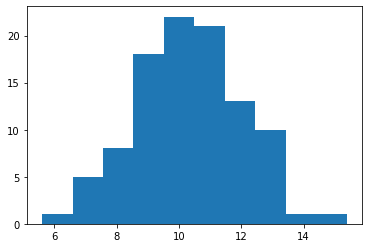

In [57]:
plt.hist(x)

In [58]:
np.mean(x)
np.std(x)

1.754504014602591

In [59]:
# x에서 마지막 데이터 2개를 모두 100으로
x[98:100] = 100
x

array([ 12.78,   9.73,   9.74,   8.18,  13.32,  11.16,  10.87,  12.82,
        13.93,  10.36,   8.62,   8.55,  12.37,   9.42,  11.43,   8.78,
         6.89,   8.56,  10.11,  11.39,  11.58,  12.72,  12.83,   7.67,
         6.6 ,   8.71,  12.08,  10.81,   9.08,   8.17,   8.66,   9.9 ,
        10.99,  10.81,  11.53,  11.29,  11.11,   9.  ,  11.7 ,  10.22,
         9.9 ,  12.5 ,   9.86,   9.22,   6.81,  12.09,  11.25,  15.38,
         9.13,  13.06,  12.76,   6.8 ,  10.64,  10.78,   8.51,   8.04,
        11.4 ,   9.81,   9.68,  10.3 ,   8.76,  10.92,  12.27,  10.83,
        11.42,   7.96,   9.88,  11.99,  10.08,  10.43,   9.37,   7.33,
         9.81,   9.34,  12.56,  10.37,   9.98,  11.23,  11.25,   9.32,
        11.46,   9.62,  11.69,   8.22,  11.46,  12.77,  11.65,   9.75,
         7.72,   9.76,  10.52,   9.46,  11.82,   9.32,   9.96,  12.14,
         5.61,  10.49, 100.  , 100.  ])

In [60]:
np.mean(x)
np.std(x)
np.median(x)

10.363706094859443

(array([ 0.,  0.,  1.,  8., 36., 36., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

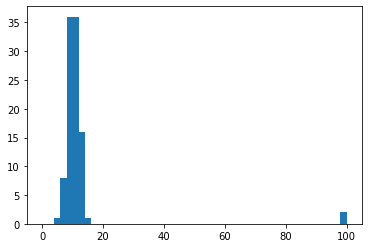

In [61]:
plt.hist(x,bins=np.arange(0,102,2)) # 막대 bar 간격이 2

In [62]:
x = x.reshape(-1,1) # 100행 1열
xss = StandardScaler().fit_transform(x)

In [64]:
print(np.mean(xss))
print(np.std(xss))

-7.105427357601002e-17
1.0


(array([97.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.51,  0.23,  0.98,  1.72,  2.47,  3.21,  3.95,  4.7 ,  5.44,
         6.19,  6.93]),
 <a list of 10 Patch objects>)

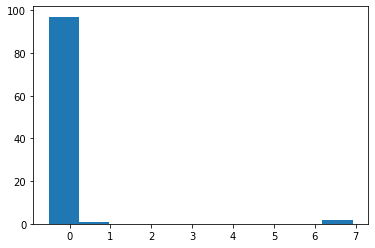

In [65]:
plt.hist(xss)

(array([ 1.,  5.,  8., 17., 22., 21., 12., 10.,  1.,  1.]),
 array([-0.51, -0.44, -0.36, -0.28, -0.2 , -0.13, -0.05,  0.03,  0.1 ,
         0.18,  0.26]),
 <a list of 10 Patch objects>)

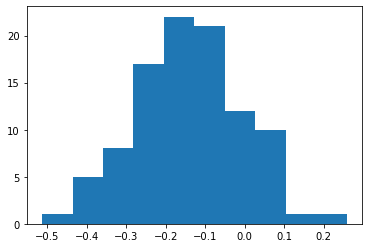

In [66]:
xssin = xss[xss < 5]
plt.hist(xssin)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 26., 52., 14.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([-2.00e+00, -1.80e+00, -1.60e+00, -1.40e+00, -1.20e+00, -1.00e+00,
        -8.00e-01, -6.00e-01, -4.00e-01, -2.00e-01, -4.44e-16,  2.00e-01,
         4.00e-01,  6.00e-01,  8.00e-01,  1.00e+00,  1.20e+00,  1.40e+00,
         1.60e+00,  1.80e+00]),
 <a list of 19 Patch objects>)

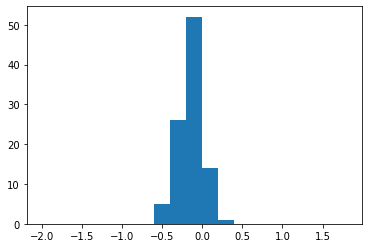

In [67]:
plt.hist(xssin, bins=np.arange(-2,2,0.2))
# 극단치를 제거하고 표준화된 데이터에 대해 시각화를 해보면

In [ ]:
#중앙값과 IQR을 이용한 표준화 (RobustSclaer)

In [68]:
x.mean() # 12.11
np.median(x) #10.36

10.363706094859443

In [71]:
q1 = np.percentile(x,25) # 1사분위수, 9.2919
q1

9.29196029684906

In [72]:
q3 = np.percentile(x,75) # 3사분위수,11.5462
q3

11.546209619865312

In [73]:
IQR = q3 - q1
IQR #2.254

# 단순하게는 
# IQR*1.5+Q3 => 2.25*1.5 + 11.54 = 약 15보다 큰 값은 OUTLIER
# Q1-IQR*1.5=> 9.291 - 2.25*1.5 = 약 5.91보다 작은 값은 OUTLIER

2.2542493230162517

In [76]:
xrs = RobustScaler().fit_transform(x)
xrs

array([[ 1.07e+00],
       [-2.81e-01],
       [-2.75e-01],
       [-9.70e-01],
       [ 1.31e+00],
       [ 3.52e-01],
       [ 2.24e-01],
       [ 1.09e+00],
       [ 1.58e+00],
       [-3.16e-03],
       [-7.72e-01],
       [-8.03e-01],
       [ 8.91e-01],
       [-4.20e-01],
       [ 4.74e-01],
       [-7.01e-01],
       [-1.54e+00],
       [-7.99e-01],
       [-1.11e-01],
       [ 4.53e-01],
       [ 5.41e-01],
       [ 1.05e+00],
       [ 1.10e+00],
       [-1.20e+00],
       [-1.67e+00],
       [-7.35e-01],
       [ 7.62e-01],
       [ 1.99e-01],
       [-5.67e-01],
       [-9.73e-01],
       [-7.56e-01],
       [-2.07e-01],
       [ 2.78e-01],
       [ 1.99e-01],
       [ 5.19e-01],
       [ 4.10e-01],
       [ 3.33e-01],
       [-6.06e-01],
       [ 5.95e-01],
       [-6.21e-02],
       [-2.05e-01],
       [ 9.47e-01],
       [-2.24e-01],
       [-5.08e-01],
       [-1.58e+00],
       [ 7.64e-01],
       [ 3.94e-01],
       [ 2.22e+00],
       [-5.45e-01],
       [ 1.20e+00],


In [78]:
np.median(xrs) # (각 데이터 - 중위수) / IQR

0.0

(array([97.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-2.11,  2.08,  6.26, 10.45, 14.64, 18.83, 23.01, 27.2 , 31.39,
        35.58, 39.76]),
 <a list of 10 Patch objects>)

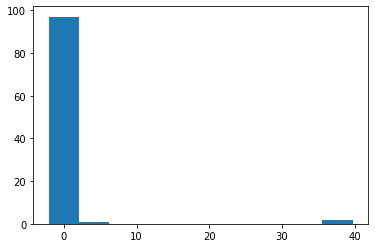

In [80]:
np.std(xrs)
plt.hist(xrs)

(array([ 0.,  1.,  3.,  1.,  4.,  5.,  7.,  9., 12.,  7.,  8.,  9., 12.,
         5.,  4.,  7.,  1.,  1.,  0.]),
 array([-2.00e+00, -1.80e+00, -1.60e+00, -1.40e+00, -1.20e+00, -1.00e+00,
        -8.00e-01, -6.00e-01, -4.00e-01, -2.00e-01, -4.44e-16,  2.00e-01,
         4.00e-01,  6.00e-01,  8.00e-01,  1.00e+00,  1.20e+00,  1.40e+00,
         1.60e+00,  1.80e+00]),
 <a list of 19 Patch objects>)

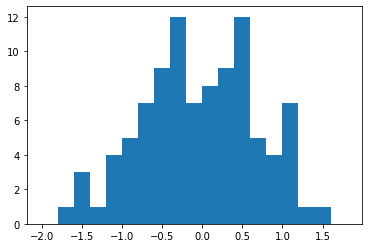

In [81]:
xrsin = xrs[xrs < 4]
plt.hist(xrsin, bins = np.arange(-2,2,0.2))

In [ ]:
# 분류/예측 모델을 만드는데 있어, 데이터(변수)의 산포가 더 넓게(크게) 퍼져있는
# 변수가 훨씬 유용

In [ ]:
# 정규화 : (각열 데이터 - 각열 최소값) / (각열 최대값 - 각열 최소값) = 0~1
# 각열 최소값은 :0 최대값 :1

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
x = np.array([[10, -10, 1],
             [5, 0, 2],
             [0, 10, 3]])
x

array([[ 10, -10,   1],
       [  5,   0,   2],
       [  0,  10,   3]])

In [88]:
# 1. 0~1 사이의 값으로 정규화 (Numpy)
(x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

array([[1. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [0. , 1. , 1. ]])

In [89]:
# 2. 0~1 사이의 값으로 정규화 (MInMaxScaler) 
mms = MinMaxScaler()
mms.fit_transform(x)

array([[1. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [0. , 1. , 1. ]])

In [90]:
MinMaxScaler().fit_transform(x)

array([[1. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [0. , 1. , 1. ]])

In [92]:
#3. 0~1 사이의 값으로 정규화(minmax_scale함수)
from sklearn.preprocessing import minmax_scale

In [93]:
minmax_scale(x)

array([[1. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [0. , 1. , 1. ]])

In [ ]:
# 정규화 : 연속형 변수를 0~1 사이의 범위의 연속형 값으로 변환
# 이진화(이항변수화) : 연속형 변수값을 기준값에 따라 0 또느 1로 변환

In [94]:
x

array([[ 10, -10,   1],
       [  5,   0,   2],
       [  0,  10,   3]])

In [96]:
from sklearn.preprocessing import Binarizer

In [97]:
bz = Binarizer().fit(x)
print(bz)

Binarizer()


In [98]:
bz.transform(x) # 0 이하는 0, 0 초과는 1로 이진화

array([[1, 0, 1],
       [1, 0, 1],
       [0, 1, 1]])

In [ ]:
# threshold : 경계값

In [99]:
Binarizer(threshold = 2).fit_transform(x)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 1]])

In [ ]:
from sklearn.preprocessing import binarize
binariz